# **Heart Disease Dataset**

**Public Health Dataset**


## **About Dataset**
###**Context**
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

###**Content**
**Attribute Information:**

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

# **Installing require Tools**

In [1]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


#**Import the Libraries**

In [3]:
## import some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import gradio as gr

#**Data Collecction and Preprocessing**

In [4]:
# Loading the dataset into a pandas DataFrame
heart_data = pd.read_csv('heart.csv')  # Use this to identify issues

In [6]:
# Display the first few rows
print("First 5 rows of the dataset:")
heart_data.head()


First 5 rows of the dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
# Display the last few rows
print("Last 5 rows of the dataset:")
heart_data.tail()


Last 5 rows of the dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [7]:
# Checking the shape of the dataset
heart_data.shape    # Outputs the number of rows and columns in the dataset.

(1025, 14)

In [8]:
# Statistical description of the dataset
print("\nStatistical Description of the Dataset:")
heart_data.describe()


Statistical Description of the Dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# Check for missing values
missing_values = heart_data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [11]:
# Geerating some Information about the dataset
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [12]:
# Number of values for Target Variable
heart_data['target'].value_counts()

,count
target,
1,526
0,499


In [48]:
# Number of values for Sex Variable
heart_data['sex'].value_counts()

,count
sex,
1,713
0,312


In [49]:
# Number of values for Cp Variable
heart_data['cp'].value_counts()

,count
cp,
0,497
2,284
1,167
3,77


In [50]:
# Number of values for restecg Variable
heart_data['restecg'].value_counts()

,count
restecg,
1,513
0,497
2,15


**Correlation**

In [51]:
# Number of values for restecg Variable
heart_data['exang'].value_counts()

,count
exang,
0,680
1,345


In [52]:
# Number of values for slope Variable
heart_data['slope'].value_counts()

,count
slope,
1,482
2,469
0,74


In [53]:
# Number of values for ca Variable
heart_data['ca'].value_counts()

,count
ca,
0,578
1,226
2,134
3,69
4,18


In [54]:
# Number of values for thal Variable
heart_data['thal'].value_counts()

,count
thal,
2,544
3,410
1,64
0,7


In [13]:
corr = heart_data.corr()
print(corr)

               age       sex        cp  trestbps  ...     slope        ca      thal    target
age       1.000000 -0.103240 -0.071966  0.271121  ... -0.169105  0.271551  0.072297 -0.229324
sex      -0.103240  1.000000 -0.041119 -0.078974  ... -0.026666  0.111729  0.198424 -0.279501
cp       -0.071966 -0.041119  1.000000  0.038177  ...  0.131633 -0.176206 -0.163341  0.434854
trestbps  0.271121 -0.078974  0.038177  1.000000  ... -0.120445  0.104554  0.059276 -0.138772
chol      0.219823 -0.198258 -0.081641  0.127977  ... -0.014248  0.074259  0.100244 -0.099966
fbs       0.121243  0.027200  0.079294  0.181767  ... -0.061902  0.137156 -0.042177 -0.041164
restecg  -0.132696 -0.055117  0.043581 -0.123794  ...  0.086086 -0.078072 -0.020504  0.134468
thalach  -0.390227 -0.049365  0.306839 -0.039264  ...  0.395308 -0.207888 -0.098068  0.422895
exang     0.088163  0.139157 -0.401513  0.061197  ... -0.267335  0.107849  0.197201 -0.438029
oldpeak   0.208137  0.084687 -0.174733  0.187434  ... -0.575

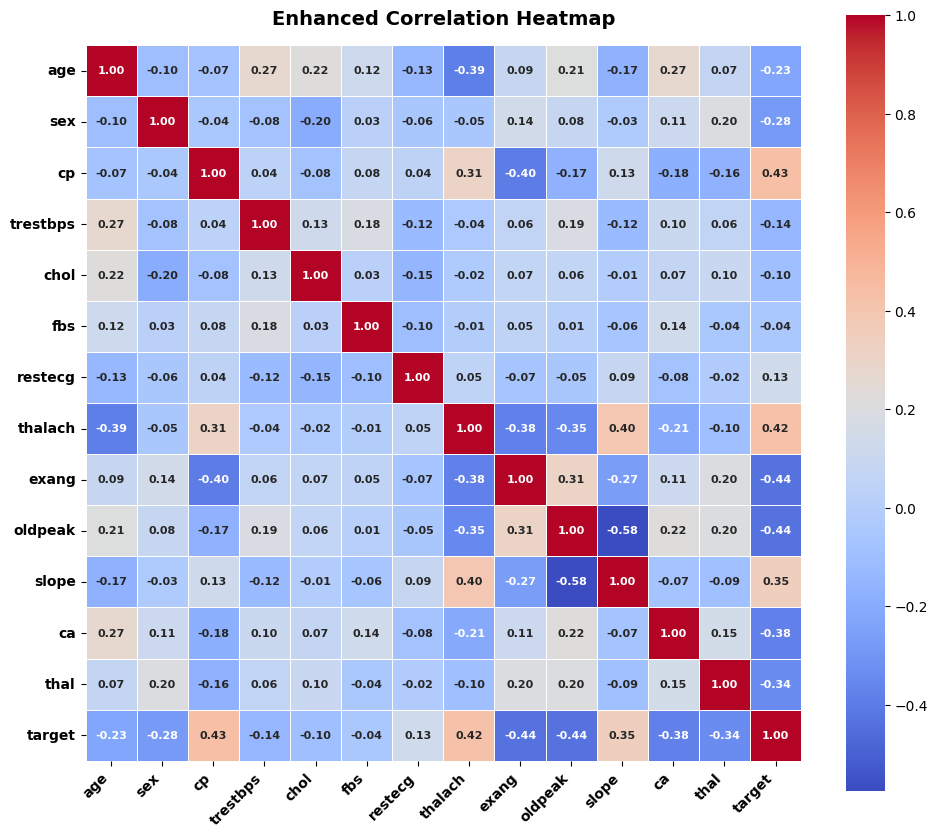

In [15]:
# Create the heatmap with enhancements
plt.figure(figsize=(10, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
    square=True,
    annot_kws={"size": 8, "weight": "bold"},
)
plt.title("Enhanced Correlation Heatmap", fontsize=14, fontweight="bold", pad=15)
plt.xticks(fontsize=10, rotation=45, ha="right", weight="bold")
plt.yticks(fontsize=10, weight="bold")
plt.tight_layout()

**1 ----> Defective Heart**

**0 ----> Healthy Heart**

# Splitting the features and target Variable

In [16]:
# Splitting features and target
X = heart_data.drop(columns="target", axis=1)
y = heart_data["target"]

In [17]:
print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

Features (X):
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal
0   52    1   0       125   212    0        1      168      0      1.0      2   2     3
1   53    1   0       140   203    1        0      155      1      3.1      0   0     3
2   70    1   0       145   174    0        1      125      1      2.6      0   0     3
3   61    1   0       148   203    0        1      161      0      0.0      2   1     3
4   62    0   0       138   294    1        1      106      0      1.9      1   3     2

Target (y):
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


# **Splitting the dataset into Training and Test sets**

In [26]:
# Splitting the dataset into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y,  random_state=3)
print("\nDataset split completed:")
print(f"Total samples: {X.shape[0]}, Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")


Dataset split completed:
Total samples: 1025, Training samples: 922, Test samples: 103


In [27]:
# checking the number of Test and Train dataset
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (922, 13) (103, 13)


# **Model Training**

In [20]:
# Initialize the model
logReg_model = LogisticRegression()

In [28]:
# Training the LogisticRegression model with train data
logReg_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#**Model Evaluation**

In [29]:
# Calculate accuracy on the training data
X_train_pred = logReg_model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_pred, y_train)
print('Accuracy on training data : ', train_data_accuracy)


Accuracy on training data :  0.8633405639913232


In [30]:
# Generate and display the confusion matrix on the training data
# The confusion matrix shows the counts of True Positives, True Negatives, False Positives, and False Negatives
conf_matrix = confusion_matrix(y_train, X_train_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[363  86]
 [ 40 433]]


In [47]:
# Generate and display the classification report
# The classification report includes precision, recall, F1-score, and support for each class
class_report = classification_report(y_train, X_train_pred, target_names=["Healthy Heart (0)", "Defective Heart (1)"])
print("\nClassification Report:")
print(class_report)


Classification Report:
                     precision    recall  f1-score   support

  Healthy Heart (0)       0.90      0.81      0.85       449
Defective Heart (1)       0.83      0.92      0.87       473

           accuracy                           0.86       922
          macro avg       0.87      0.86      0.86       922
       weighted avg       0.87      0.86      0.86       922



In [32]:
# accuracy on the test data
X_test_pred = logReg_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, y_test)
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.8058252427184466


In [33]:
# Generate and display the confusion matrix on the test data
# The confusion matrix shows the counts of True Positives, True Negatives, False Positives, and False Negatives
conf_matrix = confusion_matrix(y_test, X_test_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[40 10]
 [10 43]]


In [46]:
# Generate and display the classification report
# The classification report includes precision, recall, F1-score, and support for each class
class_report = classification_report(y_test, X_test_pred, target_names=["Healthy Heart (0)", "Defective Heart (1)"])
print("\nClassification Report:")
print(class_report)


Classification Report:
                     precision    recall  f1-score   support

  Healthy Heart (0)       0.80      0.80      0.80        50
Defective Heart (1)       0.81      0.81      0.81        53

           accuracy                           0.81       103
          macro avg       0.81      0.81      0.81       103
       weighted avg       0.81      0.81      0.81       103



# **Making a Predictive System**

In [42]:
# Sample input data (new instance to classify)
input_data = [58,0,0,100,248,0,0,122,0,1,1,0,2]

# Converting input data to a NumPy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshaping the input array for prediction (to match model's expected input shape)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Making a prediction
prediction = logReg_model.predict(input_data_reshaped)
print(prediction)

# Outputting the result
if prediction[0] == 0:
    print("The Person does not have Heart Disease (i.e. Healthy Heart)")
else:
    print("The Person have Heart Disease (i.e. Defective Heart)")

[1]
The Person have Heart Disease (i.e. Defective Heart)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [45]:
# Sample input data (new instance to classify)
input_data = [61,1,0,148,203,0,1,161,0,0,2,1,3]

# Converting input data to a NumPy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshaping the input array for prediction (to match model's expected input shape)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Making a prediction
prediction = logReg_model.predict(input_data_reshaped)
print(prediction)

# Outputting the result
if prediction[0] == 0:
    print("The Person does not have Heart Disease (i.e. Healthy Heart)")
else:
    print("The Person have Heart Disease (i.e. Defective Heart)")

[0]
The Person does not have Heart Disease (i.e. Healthy Heart)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [43]:
def predict_heart_disease(input_data):
    """
    Predicts loan status based on input data using the trained SVM model.

    Parameters:
        input_data (list): A list of values corresponding to the features in the order:
                           [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak,
                           slope, ca, thal]

    Returns:
        str: Prediction result (Loan Approved or Not Approved).
    """
    # Convert input_data to a NumPy array
    input_array = np.array(input_data).reshape(1, -1)

    # Ensure the model and scaler (if used) are applied to the input
    prediction = logReg_model.predict(input_array)

    # Interpret and return the result
    if prediction[0] == 0:
        return "The Person does not have Heart Disease (i.e. Healthy Heart)"
    else:
        return "The Person have Heart Disease (i.e. Defective Heart)"


In [44]:
# Example: Predict for a healthy or defective heart
# Sample data: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope,
#               ca, thal]
sample_data = [58,0,0,100,248,0,0,122,0,1,1,0,2]


# Call the function to predict
result = predict_heart_disease(sample_data)
print("Prediction Result:", result)

Prediction Result: The Person have Heart Disease (i.e. Defective Heart)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [38]:
# Example: Predict for a healthy or defective heart
# Sample data: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope,
#               ca, thal]
sample_data = [61,1,0,148,203,0,1,161,0,0,2,1,3]

# Call the function to predict
result = predict_heart_disease(sample_data)
print("Prediction Result:", result)

Prediction Result: The Person does not have Heart Disease (i.e. Healthy Heart)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [59]:
def gradio_predict(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):
    # Convert inputs to a list
    input_data = [
        float(age), float(sex), float(cp), float(trestbps),
        float(chol), float(fbs), float(restecg), float(thalach), float(exang),
        float(oldpeak), float(slope), float(ca), float(thal)
        ]

    # Call the prediction function (you need to define predict_wine_quality)
    prediction = predict_heart_disease(input_data)  # Ensure predict_wine_quality is defined
    return prediction

# Set up the Gradio interface
interface = gr.Interface(
    fn=gradio_predict,
    inputs=[
        gr.Number(label="Age"),
        gr.Dropdown(["0", "1"], label="Sex"),
        gr.Dropdown(["0", "1", "2", "3"], label="cp"),
        gr.Number(label="trestbps"),
        gr.Number(label="chol"),
        gr.Number(label="fbs"),
        gr.Dropdown(["0", "1", "2"], label="restecg"),
        gr.Number(label="thalach"),
        gr.Dropdown(["0", "1"], label="exang"),
        gr.Number(label="oldpeak"),
        gr.Dropdown(["0", "1", "2"], label="slope"),
        gr.Dropdown(["0", "1", "2", "3", "4"], label="ca"),
        gr.Dropdown(["0", "1", "2", "3"], label="thal"),
    ],
    outputs=gr.Textbox(label="Prediction Result"),
    title="Heart Disease Prediction",
    description="Enter the required details to predict if a heart will be Good or Bad."
)

# Launch the interface
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://066917c8bb77bfe379.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
